In [1]:
from src.kernel.timeline import Timeline
from src.components.optical_channel import ClassicalChannel, PULSE_QuantumChannel
from src.kernel.event import Event
from src.kernel.process import Process
from src.topology.node import raman_receiver_node, raman_sender_node
from src.topology.node import PULSE_BSMNode, raman_sender_node
from src.entanglement_management.raman_protocols import RamanTestReceiver
from matplotlib import pyplot as plt
import traceback
import numpy as np
import os
from datetime import datetime

In [2]:
def init_experiment_setup(params):
    sender1 = raman_sender_node("PULSE_Quantum_Router_1", params["tl"], params["num_iterations"], params["clock_power"], params["narrow_band_filter_bandwidth"], params["quantum_channel_wavelength"], 
                               params["mean_photon_num"], params["is_distinguishable"], params["pulse_separation"], params["batch_size"], params["pulse_width"])
    sender2 = raman_sender_node("PULSE_Quantum_Router_3", params["tl"], params["num_iterations"], params["clock_power"], params["narrow_band_filter_bandwidth"], params["quantum_channel_wavelength"], 
                               params["mean_photon_num"], params["is_distinguishable"], params["pulse_separation"], params["batch_size"], params["pulse_width"])
    
    receiver = PULSE_BSMNode("PULSE_BSM_2", params["tl"], ['sender1', "sender2"])
    # idler_receiver = PULSE_BSM("idler_receiver", params["tl"], 'sender', params["collection_probability"], params["dark_count_rate"], params["dead_time"], params["time_resolution"])

    receiver_protocol = RamanTestReceiver(receiver, params["pulse_separation"])

    # signal_receiver.attach_detector_to_receiver(receiver_protocol)
    receiver.attach_detector_to_receiver(receiver_protocol)
    sender1.attach_lightsource_to_receivers("receiver")
    sender2.attach_lightsource_to_receivers("receiver")


    Qchannel1 = PULSE_QuantumChannel("Qchannel1", params["tl"], params["quantum_channel_attenuation"], params["classical_channel_attenuation"], params["distance"], params["raman_coefficient"], 
                                    params["polarization_fidelity"], params["light_speed"], params["max_rate"], params["quantum_channel_wavelength"], params["classical_channel_wavelength"], window_size = params["window_size"])
    Qchannel2 = PULSE_QuantumChannel("Qchannel2", params["tl"], params["quantum_channel_attenuation"], params["classical_channel_attenuation"], params["distance"], params["raman_coefficient"], 
                                    params["polarization_fidelity"], params["light_speed"], params["max_rate"], params["quantum_channel_wavelength"], params["classical_channel_wavelength"], window_size = params["window_size"])
    Cchannel1 = ClassicalChannel("Cchannel1", params["tl"], params["distance"])
    Cchannel2 = ClassicalChannel("Cchannel2", params["tl"], params["distance"])

    Qchannel1.set_ends(sender1, "receiver")
    Qchannel2.set_ends(sender2, "receiver")
    Cchannel1.set_ends(sender1, "receiver")
    Cchannel2.set_ends(sender2, "receiver")

    return sender1, sender2

In [3]:
experimental_parameters = {
    "tl" : Timeline(5000e12),

    # Parameters
    # Detector_parameters
    "collection_probability" : 10**(-1.2),
    "dark_count_rate" : 100, #100,
    "dead_time" : 25000,
    "time_resolution" : 50,

    # Optical channel
    "quantum_channel_attenuation" : 0.44,
    "classical_channel_attenuation" : 0.5,
    "distance" : 2,
    "raman_coefficient" : 33e-10,
    "polarization_fidelity" : 1,
    "light_speed" : 3e8,
    "max_rate" : 1e12,
    "quantum_channel_wavelength" : 1536e-9,
    "classical_channel_wavelength" : 1610e-9,
    "window_size" : 1e11,

    # Light Source
    # "wavelength" : quantum_channel_wavelength,
    "mean_photon_num" : 2, # 0.00316228, # 0.01
    "is_distinguishable" : True,
    "pulse_separation" : 5e3,
    "pulse_width" : 80,
    "batch_size" : 5000, # 50000000,
    "num_iterations" : 5, # 240, 600,

    # Clock parameters
    "clock_power" : 0.0003,
    "narrow_band_filter_bandwidth" : 0.03,
}

time of start: 2023-07-20 15:06:55.161534
scheduling Raman photon detection at Qchannel1
Raman photosns added 17940
<class 'int'>
emitting  now. Emission time is: 0
emitting  now. Emission time is: 12500
emitting  now. Emission time is: 25000
emitting  now. Emission time is: 37500
emitting  now. Emission time is: 50000
last emit time: 50000
<class 'int'>
emitting  now. Emission time is: 0
emitting  now. Emission time is: 12500
emitting  now. Emission time is: 25000
emitting  now. Emission time is: 37500
emitting  now. Emission time is: 50000
last emit time: 50000
Scheduling arrivals of Raman photons
Scheduling arrivals of Raman photons
Photon object created at sender1. sending over channel now. Photon number is: 4
in optical channel Qchannel1, sending photon with photon number 0
Photon object created at sender2. sending over channel now. Photon number is: 1
in optical channel Qchannel2, sending photon with photon number 0
Photon object created at sender1. sending over channel now. Phot

c:\Users\anshs\Desktop\study\Argonne\SeQUeNCe\SeQUeNCe\src\entanglement_management\raman_protocols.py:163: RuntimeWarning: invalid value encountered in true_divide
  CAR = matched_correlation/(sum(unmatched_correlations)/len(unmatched_correlations))
c:\Users\anshs\Desktop\study\Argonne\SeQUeNCe\SeQUeNCe\src\entanglement_management\raman_protocols.py:168: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


CAR: nan


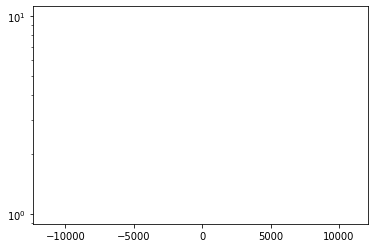

simulation ended at 2023-07-20 15:06:57.020519


In [4]:
try:
    now = datetime.now()
    print("time of start:", now)
    experimental_parameters["tl"] = Timeline(5000e12)
    # experimental_parameters["mean_photon_num"] = 0.01
    sender1, sender2 = init_experiment_setup(experimental_parameters)
    
    process1 = Process(sender1.protocol, "start", [True])
    event1 = Event(0, process1)
    experimental_parameters["tl"].schedule(event1)

    process2 = Process(sender2.protocol, "start", [False])
    event2 = Event(0, process2)
    experimental_parameters["tl"].schedule(event2)

    experimental_parameters["tl"].init()
    experimental_parameters["tl"].run()
    #     file = open("CAR_Data.txt")
    #     CAR_Data.append(list(map(float, file.readlines())))
    #     file.close()
    #     os.remove("CAR_Data.txt")
    # plt.boxplot(list(zip(*CAR_Data)))
    # plt.xticks(np.arange(num_samples)+1, np.logspace(min_mpn, max_mpn, num_samples))

        

    # print(signal_receiver.protocol.coincidence_times)
    
    # n, bins, patches = plt.hist(signal_receiver.protocol.detection_times, range(-28125, 28126, 6250))
    # plt.show() 
    print("simulation ended at", datetime.now())   
except Exception:
    print(traceback.format_exc())

try:
    CAR_Data = []
    for j in range(1):
        for i in np.linspace(-1.2,-1.8,5):
            print("I,j:", i, j)
            experimental_parameters["tl"] = Timeline(5000e12)
            experimental_parameters["collection_probability"] = 10**i
            sender = init_experiment_setup(experimental_parameters)
            process = Process(sender.protocol, "start", [])
            event = Event(0, process)
            experimental_parameters["tl"].schedule(event)

            experimental_parameters["tl"].init()
            experimental_parameters["tl"].run()
        file = open("CAR_Data.txt")
        CAR_Data.append(list(map(float, file.readlines())))
        file.close()
   
except Exception:
    print(traceback.format_exc())

len of temp_data: 2
[[nan, nan], [], []]


C:\Users\anshs\AppData\Local\Temp/ipykernel_25696/420326573.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x2e87733f640>,
 'caps': [<matplotlib.lines.Line2D at 0x2e87732e9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e87733fc70>],
 'medians': [<matplotlib.lines.Line2D at 0x2e87734b580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e87734bb20>],
 'means': [<matplotlib.lines.Line2D at 0x2e87734b850>]}

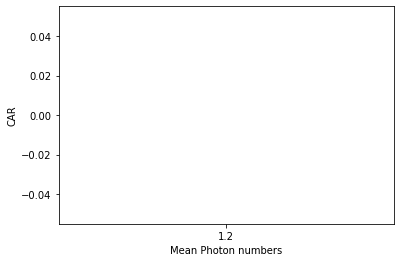

In [18]:
CAR_Data = []
temp_data = []
file = open("CAR_Data.txt")
temp_data.append(list(map(float, file.readlines())))
file.close()

print("len of temp_data:", len(temp_data[0]))

for i in range(3):
    CAR_Data.append(temp_data[0][i*5:(i+1)*5])

print(CAR_Data)

fig, ax = plt.subplots()
fig.canvas.draw()
labels = [str(i)[1:6] for i in np.linspace(-1.2,-1.8,5)]# [0.000562341,0.001,0.001778279,0.00316228,0.00562341,0.01,0.01778279,0.03162278,0.05623413,0.1]]
ax.set_xticklabels(labels)
ax.set_xlabel("Mean Photon numbers")
ax.set_ylabel("CAR")
plt.boxplot(list(zip(*CAR_Data)), meanline = True, showmeans=True, medianprops={"linewidth":0})

In [19]:
import numpy as np
a = np.array([123456788,234787359837,324782648923,4743287894279])
# b = np.array([5.,6.,7.,8.])
print(type(a[1]))
with open("temp.txt", "wb+") as fileID:
    fileID.write(a.data)
# fileID.close()

# fileID = open("temp.txt", "ab+")
# fileID.write(b.data)
# fileID.close()



<class 'numpy.int64'>


In [20]:
import time
a = np.array([])
start = time.time()
# a = np.random.rand(1000000)
for i in range(1000000):
    np.random.rand()
print("time taken:", time.time()-start)


time taken: 0.46305084228515625


In [1117]:

""" adds a photon train of noisy photons scattered from the classical band into the quantum band."""

h = 6.62607015 * 10**(-34)
c = 3 * 10**8
clock_power = 0.0003
raman_coefficient = 33e-10
narrow_band_filter_bandwidth = 0.3
attenuation = 0.1
classical_channel_attenuation = 7
quantum_channel_wavelength = 1536e-9

window_size = 6.66e6
pulse_width = 1e-5
distance = 2

raman_power = np.abs(clock_power * raman_coefficient * narrow_band_filter_bandwidth * (np.exp(-attenuation * pulse_width) - np.exp(-classical_channel_attenuation * pulse_width)) / (attenuation - classical_channel_attenuation))
raman_energy = raman_power * window_size/1e12
mean_num_photons = (raman_energy / (h * c / quantum_channel_wavelength))

num_photons_added = sum(np.random.poisson(mean_num_photons, 50000))
dAlpha = attenuation - classical_channel_attenuation
positions = []
# np.exp(distance * classical_channel_attenuation)
for i in range(num_photons_added):
    positions.append((1/dAlpha) * np.log((np.exp(distance * dAlpha) - 1) * np.random.rand() + 1))


print("max Position:", max(positions))
print("Raman photosns added", num_photons_added)

# photon_generation_times = np.random.rand(num_photons_added) * window_size

max Position: 0.3189550474392806
Raman photosns added 12


In [ ]:
import re
a = "sender_42"
print(re.find("_", a))

NameError: name 'i' is not defined